In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('app_train_pred_final.csv')

In [3]:
data.shape

(307507, 44)

In [4]:
test = pd.read_csv('app_test_pred_final.csv')

In [5]:
test.shape

(48744, 43)

In [6]:
X = data.loc[:, data.columns != 'TARGET']
y = data.loc[:, data.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

forest = GradientBoostingClassifier(n_estimators = 100, max_depth = 5, max_features = 15)
forest.fit(X_train, y_train.values.ravel())

y_pred_proba = forest.predict_proba(X_test)
y_pred_proba_train = forest.predict_proba(X_train)

In [7]:
score = metrics.roc_auc_score(y_test['TARGET'].values, y_pred_proba[:, 1])
print("Test: ", score)
score = metrics.roc_auc_score(y_train['TARGET'].values, y_pred_proba_train[:, 1])
print("Train: ", score)

Test:  0.7621813269666108
Train:  0.7937672604958015


In [8]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

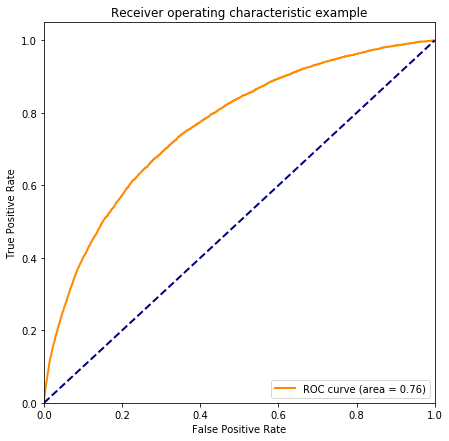

In [9]:
plt.figure(figsize = (7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [10]:
cutoff = 0.0; 

lost = 0.8;
plus = 0.05; 

y_plus = []
x_cut = []
y_delta = []

while cutoff <= 1.0:
    y_predict = []
    
    for i in range(y_pred_proba_train.shape[0]):
        if y_pred_proba_train[i][0] > cutoff: 
            y_predict.append(0)
        else: 
            y_predict.append(1)
        
    allPlus = 0
    allDelta = 0
            
    temp = X_train['AMT_CREDIT'].values
    target = y_train.values
    
    for i in range(temp.shape[0]): 
        if y_predict[i] == 0:
            if target[i] == 0: 
                allPlus += plus*temp[i]
            else:
                allPlus -= lost*temp[i]
        else: 
            if target[i] == 0: 
                allDelta -= plus*temp[i]
            else:
                allDelta += lost*temp[i]
            
    
    x_cut.append(cutoff)
    y_plus.append(allPlus)
    y_delta.append(allDelta)
            
        
    cutoff += 0.01

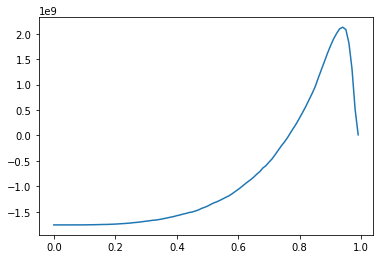

In [11]:
plt.plot(x_cut, y_plus)

In [12]:
maxx = y_plus[0]
index = 0

for i in range(100):
    if y_plus[i] > maxx: 
        maxx = y_plus[i]
        index = i
        
cutoff = x_cut[index]
print(cutoff)

0.9400000000000006


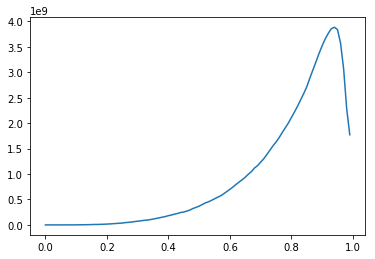

In [13]:
plt.plot(x_cut, y_delta)

In [14]:
maxx = y_delta[0]
index = 0

for i in range(100):
    if y_delta[i] > maxx: 
        maxx = y_delta[i]
        index = i
        
cutoff = x_cut[index]
print(cutoff)

0.9400000000000006


In [15]:
y_predict = []

for i in range(y_pred_proba_train.shape[0]):
    if y_pred_proba_train[i][0] > cutoff: 
        y_predict.append(0)
    else: 
        y_predict.append(1)
        
print(metrics.f1_score(y_train['TARGET'].values, y_predict))

0.2568467667289787


In [16]:
cutoff = 0.0; 

lost = 0.8;
plus = 0.05; 

y_plus = []
x_cut = []
y_delta = []

while cutoff <= 1.0:
    y_predict = []
    
    for i in range(y_pred_proba.shape[0]):
        if y_pred_proba[i][0] > cutoff: 
            y_predict.append(0)
        else: 
            y_predict.append(1)
        
    allPlus = 0
    allDelta = 0
            
    temp = X_test['AMT_CREDIT'].values
    target = y_test.values
    
    for i in range(temp.shape[0]): 
        if y_predict[i] == 0:
            if target[i] == 0: 
                allPlus += plus*temp[i]
            else:
                allPlus -= lost*temp[i]
        else: 
            if target[i] == 0: 
                allDelta -= plus*temp[i]
            else:
                allDelta += lost*temp[i]
            
    x_cut.append(cutoff)
    y_plus.append(allPlus)
    y_delta.append(allDelta)
            
    cutoff += 0.01

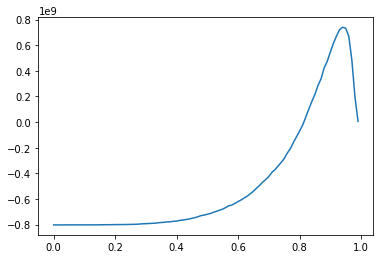

In [17]:
plt.plot(x_cut, y_plus)

In [18]:
maxx = y_plus[0]
index = 0

for i in range(100):
    if y_plus[i] > maxx: 
        maxx = y_plus[i]
        index = i
        
cutoff = x_cut[index]
print(cutoff)

0.9400000000000006


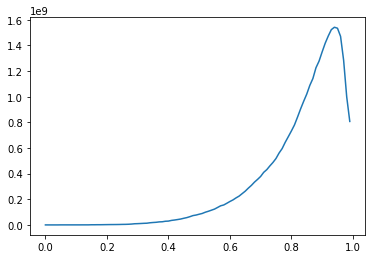

In [19]:
plt.plot(x_cut, y_delta)

In [20]:
maxx = y_delta[0]
index = 0

for i in range(100):
    if y_delta[i] > maxx: 
        maxx = y_delta[i]
        index = i
        
cutoff = x_cut[index]
print(cutoff)

0.9400000000000006


In [21]:
y_predict = []

for i in range(y_pred_proba.shape[0]):
    if y_pred_proba[i][0] > cutoff: 
        y_predict.append(0)
    else: 
        y_predict.append(1)
        
print(metrics.f1_score(y_test['TARGET'].values, y_predict))

0.2439991562961401


In [22]:
#Submission
predictions = forest.predict_proba(test)[:,1]
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('prediction.csv', index = False)

In [24]:
print(submit)

       SK_ID_CURR    TARGET
0          100001  0.030797
1          100005  0.126465
2          100013  0.036419
3          100028  0.031401
4          100038  0.138503
5          100042  0.075245
6          100057  0.017850
7          100065  0.029117
8          100066  0.022454
9          100067  0.183111
10         100074  0.054694
11         100090  0.069787
12         100091  0.126000
13         100092  0.096785
14         100106  0.029118
15         100107  0.118056
16         100109  0.054794
17         100117  0.048168
18         100128  0.082166
19         100141  0.017659
20         100150  0.043521
21         100168  0.017744
22         100169  0.070197
23         100170  0.072611
24         100171  0.056104
25         100172  0.088050
26         100184  0.167926
27         100187  0.065250
28         100212  0.164861
29         100222  0.075650
...           ...       ...
48714      455963  0.033806
48715      455965  0.024870
48716      456007  0.298818
48717      456008  0